In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.impute import SimpleImputer

In [5]:
warnings.simplefilter(action="ignore", category=FutureWarning)

In [6]:
df = pd.read_csv('/Users/sai/Desktop/pollution_2000_2021.csv')
df.head()

,Date,Year,Month,Day,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,1/1/2000,2000.0,1.0,1.0,Arizona,Maricopa,Phoenix,0.019765,0.040,10,...,23,25,3.000000,9.0,21,13,19.041667,49.0,19,46
1,1/2/2000,2000.0,1.0,2.0,Arizona,Maricopa,Phoenix,0.015882,0.032,10,...,0,26,1.958333,3.0,22,4,22.958333,36.0,19,34
2,1/3/2000,2000.0,1.0,3.0,Arizona,Maricopa,Phoenix,0.009353,0.016,9,...,8,28,5.250000,11.0,19,16,38.125000,51.0,8,48
3,1/4/2000,2000.0,1.0,4.0,Arizona,Maricopa,Phoenix,0.015882,0.033,9,...,23,34,7.083333,16.0,8,23,40.260870,74.0,8,72
4,1/5/2000,2000.0,1.0,5.0,Arizona,Maricopa,Phoenix,0.007353,0.012,9,...,2,42,8.708333,15.0,7,21,48.450000,61.0,22,58


In [7]:
df.describe(include = ['object'])

,Date,State,County,City
count,350000,289461,290426,288393
unique,5114,45,124,134
top,5/24/2011,California,Los Angeles,Los Angeles
freq,100,105183,17449,8083


In [6]:
#There are 45 States, 124 Counties and 134 cities in the dataset. 
#The NO2 Units and SO2 Units are expressed in parts per billion and O3 Units and CO Units in parts per million. 

In [8]:
#Checking and Dealing with missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350000 entries, 0 to 349999
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               350000 non-null  object 
 1   Year               349965 non-null  float64
 2   Month              318454 non-null  float64
 3   Day                308617 non-null  float64
 4   State              289461 non-null  object 
 5   County             290426 non-null  object 
 6   City               288393 non-null  object 
 7   O3 Mean            349987 non-null  float64
 8   O3 1st Max Value   350000 non-null  float64
 9   O3 1st Max Hour    350000 non-null  int64  
 10  O3 AQI             350000 non-null  int64  
 11  CO Mean            350000 non-null  float64
 12  CO 1st Max Value   350000 non-null  float64
 13  CO 1st Max Hour    350000 non-null  int64  
 14  CO AQI             350000 non-null  int64  
 15  SO2 Mean           350000 non-null  float64
 16  SO

In [9]:
#Filling missing values with imputation with variables thata are objects State, County adn City:
up_df=df
up_df['State']=up_df['State' ].fillna(up_df['State'].mode())
up_df['County']=up_df['County'].fillna(up_df['County'].mode())
up_df['City']=up_df['City' ].fillna(up_df['City'].mode())

In [10]:
#Filling missing values by use of imputation for Year, Month
new_df=df
new_df['Year']=new_df['Year' ].fillna(new_df['Year'].mean())
new_df['Month']=new_df['Month'].fillna(new_df['Month'].mean())
new_df['Day']=new_df['Day' ].fillna(new_df['Day'].mean())
new_df['O3 Mean']=new_df['O3 Mean' ].fillna(new_df['O3 Mean'].mean())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350000 entries, 0 to 349999
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               350000 non-null  object 
 1   Year               350000 non-null  float64
 2   Month              350000 non-null  float64
 3   Day                350000 non-null  float64
 4   State              289461 non-null  object 
 5   County             290426 non-null  object 
 6   City               288393 non-null  object 
 7   O3 Mean            350000 non-null  float64
 8   O3 1st Max Value   350000 non-null  float64
 9   O3 1st Max Hour    350000 non-null  int64  
 10  O3 AQI             350000 non-null  int64  
 11  CO Mean            350000 non-null  float64
 12  CO 1st Max Value   350000 non-null  float64
 13  CO 1st Max Hour    350000 non-null  int64  
 14  CO AQI             350000 non-null  int64  
 15  SO2 Mean           350000 non-null  float64
 16  SO

In [11]:
duplicate=df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Date,Year,Month,Day,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
87221,7/6/2003,2003.0,7.0,6.0,North Carolina,Mecklenburg,Charlotte,0.019412,0.025,8,...,0,3,2.666667,22.0,23,31,5.000000,14.0,23,13
108678,5/17/2004,2004.0,5.0,17.0,North Carolina,Mecklenburg,Charlotte,0.035235,0.048,11,...,0,5,2.750000,16.0,9,23,7.333333,18.0,20,17
108700,5/28/2004,2004.0,5.0,28.0,North Carolina,Mecklenburg,Charlotte,0.023412,0.051,8,...,23,7,2.791667,8.0,8,11,13.708333,35.0,22,33
108706,5/31/2004,2004.0,5.0,31.0,North Carolina,Mecklenburg,Charlotte,0.037765,0.050,15,...,0,6,2.916667,31.0,23,44,5.625000,17.0,23,16
108720,6/7/2004,2004.0,6.0,7.0,North Carolina,Mecklenburg,Charlotte,0.045882,0.058,10,...,0,5,0.083333,1.0,5,1,9.333333,21.0,6,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338263,12/8/2013,2013.0,12.0,8.0,Arkansas,Pulaski,North Little Rock,0.010765,0.014,9,...,21,5,1.112500,1.7,1,1,12.466667,17.5,8,16
338306,12/19/2013,2013.0,12.0,19.0,Arkansas,Pulaski,North Little Rock,0.029647,0.035,7,...,0,3,2.637500,5.9,1,7,9.425000,15.0,17,14
338307,12/19/2013,2013.0,12.0,19.0,Arkansas,Pulaski,North Little Rock,0.029647,0.035,7,...,0,3,1.841667,4.2,1,6,9.425000,15.0,17,14
338314,12/21/2013,2013.0,12.0,21.0,Arkansas,Pulaski,North Little Rock,0.008353,0.015,22,...,0,3,1.175000,1.4,8,1,7.845833,16.8,19,15


In [12]:
n_df=df.drop_duplicates()

In [13]:
duplicate=n_df[n_df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Date,Year,Month,Day,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI


In [ ]:
#Quantile definition:

In [14]:
# defining quantiles
quantile_CO = df['CO AQI'].quantile(0.99)
quantile_O3 = df['O3 AQI'].quantile(0.99)
quantile_SO2 = df['SO2 AQI'].quantile(0.99)
quantile_NO2 = df['NO2 AQI'].quantile(0.99)

quantile_NO2

69.0

In [15]:
# Dropping data that are greater than the 99% quantile, which lies above the value 30 fro CO.
CO_outliers = df[df['CO AQI'] > quantile_CO]
df = df.drop(CO_outliers.index, axis= 0)

In [16]:
# Dropping data that are greater than the 99% quantile, which lies above the value 143 fro O3.
O3_outliers = df[df['O3 AQI'] > quantile_O3]
df = df.drop(O3_outliers.index, axis= 0)

In [17]:
# Dropping data that are greater than the 99% quantile, which lies above the value 50 fro SO2.
SO2_outliers = df[df['SO2 AQI'] > quantile_SO2]
df = df.drop(SO2_outliers.index, axis= 0)

In [18]:
# Dropping data that are greater than the 99% quantile, which lies above the value 58 fro NO2.
NO2_outliers = df[df['NO2 AQI'] > quantile_NO2]
df = df.drop(NO2_outliers.index, axis= 0)

Text(0, 0.5, 'Frequency of AQI')

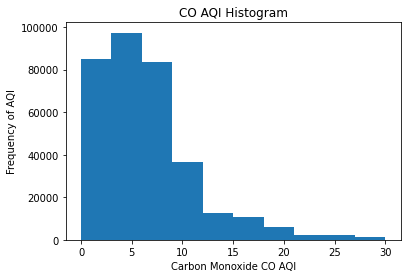

In [19]:
df['CO AQI'].plot(kind='hist')
plt.title('CO AQI Histogram')
plt.xlabel('Carbon Monoxide CO AQI')
plt.ylabel('Frequency of AQI')

In [ ]:
#After removing the observatiosn thta lies above quantiles (30) 
#we can see that most observations fall into the range between 0 and 10 parts per million.

Text(0, 0.5, 'Frequency of o3 AQI')

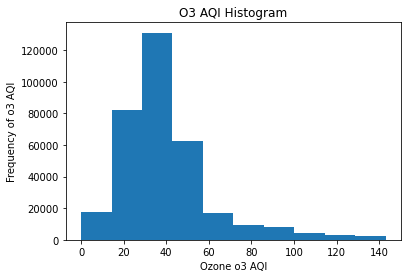

In [20]:
df['O3 AQI'].plot(kind='hist')
plt.title('O3 AQI Histogram')
plt.xlabel('Ozone o3 AQI')
plt.ylabel('Frequency of o3 AQI')

In [ ]:
#After removing the observatiosn thta lies above quantiles (143) 
#we can see that most observations fall into the range between 20 and 60 parts per million.

Text(0, 0.5, 'Frequency of SO2 AQI')

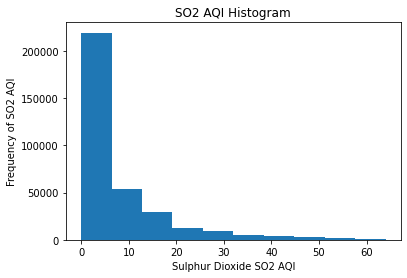

In [21]:
df['SO2 AQI'].plot(kind='hist')
plt.title('SO2 AQI Histogram')
plt.xlabel('Sulphur Dioxide SO2 AQI')
plt.ylabel('Frequency of SO2 AQI')

In [ ]:
#After removing the observatiosn thta lies above quantiles (50) 
#we can see that most observations fall into the range between 0 and 20 parts per million.

Text(0, 0.5, 'Frequency of NO2 AQI')

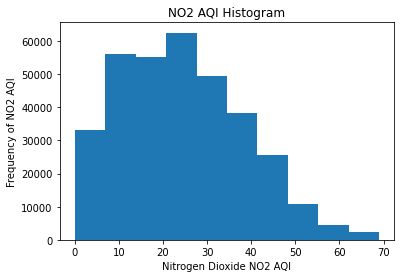

In [22]:
df['NO2 AQI'].plot(kind='hist')
plt.title('NO2 AQI Histogram')
plt.xlabel('Nitrogen Dioxide NO2 AQI')
plt.ylabel('Frequency of NO2 AQI')

In [ ]:
#After removing the observatiosn thta lies above quantiles (58) 
#we can see that most observations fall into the range between 0 and 45 parts per million.

<AxesSubplot:title={'center':'NO2 AQI'}, xlabel='Year'>

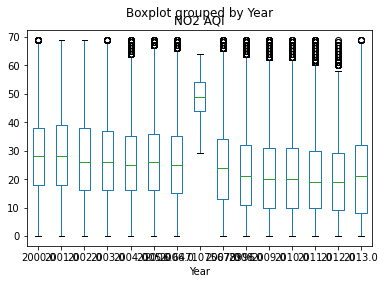

In [23]:
df.boxplot(by ='Year', column =['NO2 AQI'], grid = False)

In [ ]:
#The box plots are comparatively tall. This suggests that Air Quality Index for nitrogen dioxide are comparatively quite 
#different ranging from the year 2000 to the year

<AxesSubplot:title={'center':'SO2 AQI'}, xlabel='Year'>

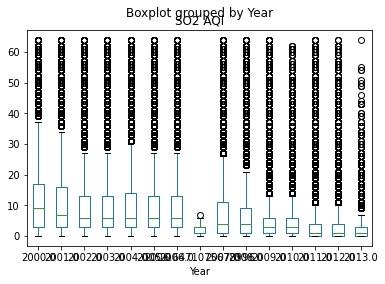

In [24]:
df.boxplot(by ='Year', column =['SO2 AQI'], grid = False)

<AxesSubplot:title={'center':'O3 AQI'}, xlabel='Year'>

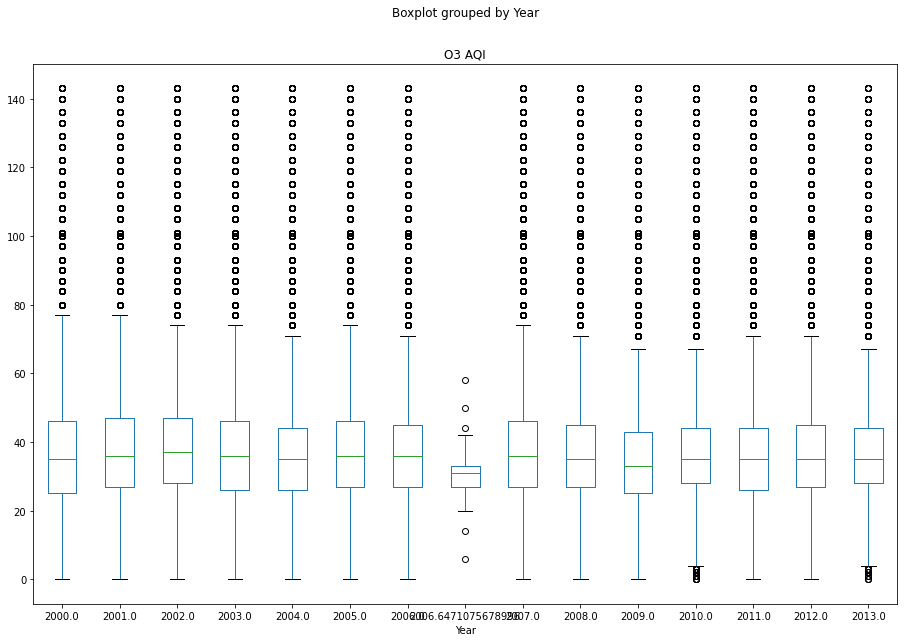

In [79]:
df.boxplot(by ='Year', column =['O3 AQI'], grid = False)

In [ ]:
#The box plot is comparatively short. This suggests that overall air quality index have a high level of 
#quality through out the period of 2000 to 2013.

<AxesSubplot:title={'center':'CO AQI'}, xlabel='Year'>

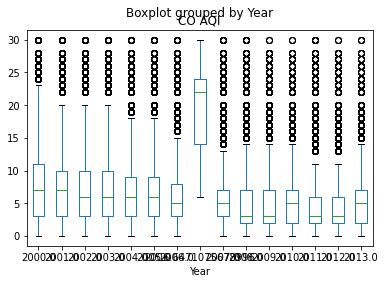

In [25]:
df.boxplot(by ='Year', column =['CO AQI'], grid = False)

In [ ]:
#The box plots are comparatively tall. This suggests that Air Quality Index are comparativly quite diffrent ranging from the year
#2000 to the year 2013

In [14]:
df['Date']  = pd.to_datetime(df['Date'])

In [28]:
# Nitrogen dioxide (NO2). 
print('Nitrogen dioxide (NO2) Data')
NO2_df=NO2_data = df[["Year","Date","State","NO2 Mean","NO2 1st Max Value", "NO2 1st Max Hour", "NO2 AQI"]]
NO2_df.head()


Nitrogen dioxide (NO2) Data


,Year,Date,State,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000.0,1/1/2000,Arizona,19.041667,49.0,19,46
1,2000.0,1/2/2000,Arizona,22.958333,36.0,19,34
2,2000.0,1/3/2000,Arizona,38.125000,51.0,8,48
25,2000.0,1/26/2000,Arizona,27.217391,42.0,0,40
26,2000.0,1/27/2000,Arizona,33.375000,51.0,8,48


Text(0.5, 1.0, 'Mean NO2 levels for each state')

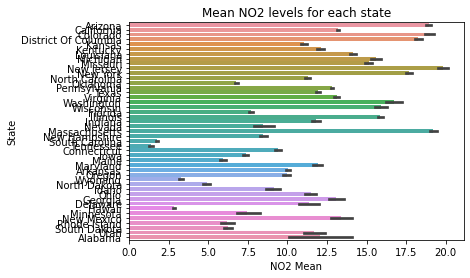

In [29]:
# Mean NO2 levels for each state
ax = sns.barplot(x="NO2 Mean",y="State", data=NO2_df)
rcParams['figure.figsize'] = 15,8
plt.title("Mean NO2 levels for each state")


In [31]:
#Ozone (O3). 
O3_data = df[["Year","Date","State","O3 Mean","O3 1st Max Value", "O3 1st Max Hour", "O3 AQI"]]
print('Ozone (O3) Data')                         
O3_data.head()


Ozone (O3) Data


,Year,Date,State,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI
0,2000.0,1/1/2000,Arizona,0.019765,0.040,10,37
1,2000.0,1/2/2000,Arizona,0.015882,0.032,10,30
2,2000.0,1/3/2000,Arizona,0.009353,0.016,9,15
25,2000.0,1/26/2000,Arizona,0.020647,0.035,10,32
26,2000.0,1/27/2000,Arizona,0.015941,0.028,10,26


Text(0.5, 1.0, 'Mean Ozone (O3) levels for each state')

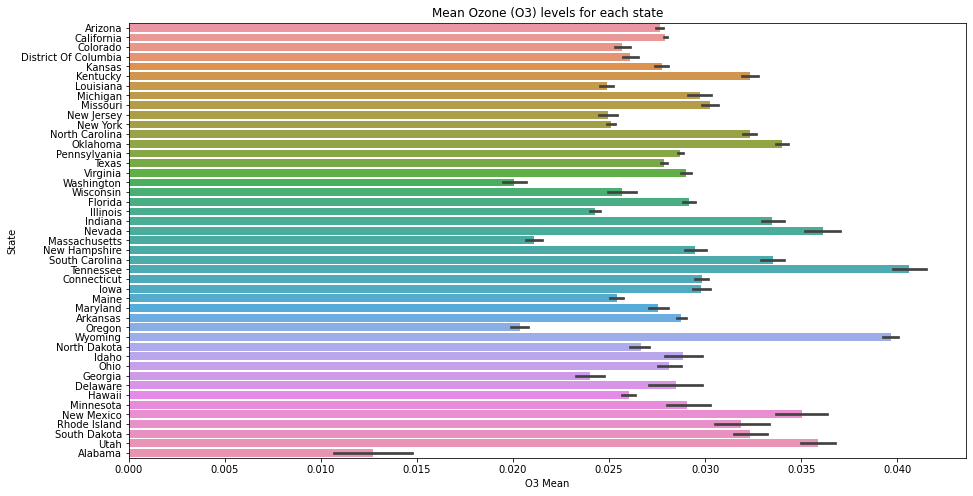

In [32]:
# Mean O3 levels for each state
ax = sns.barplot(x="O3 Mean",y="State", data=O3_data)
plt.title("Mean Ozone (O3) levels for each state")

In [33]:
#Sulphur dioxide  (SO2). 
SO2_data = df[["Year","Date","State","SO2 Mean","SO2 1st Max Value", "SO2 1st Max Hour", "SO2 AQI"]]
print('Sulphur dioxide  (SO2) Data')                     
SO2_data.head()

Sulphur dioxide  (SO2) Data


,Year,Date,State,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI
0,2000.0,1/1/2000,Arizona,3.000000,9.0,21,13
1,2000.0,1/2/2000,Arizona,1.958333,3.0,22,4
2,2000.0,1/3/2000,Arizona,5.250000,11.0,19,16
25,2000.0,1/26/2000,Arizona,3.363636,7.0,1,10
26,2000.0,1/27/2000,Arizona,3.684211,11.0,8,16


Text(0.5, 1.0, 'Mean Sulphur dioxide (SO2) levels for each state')

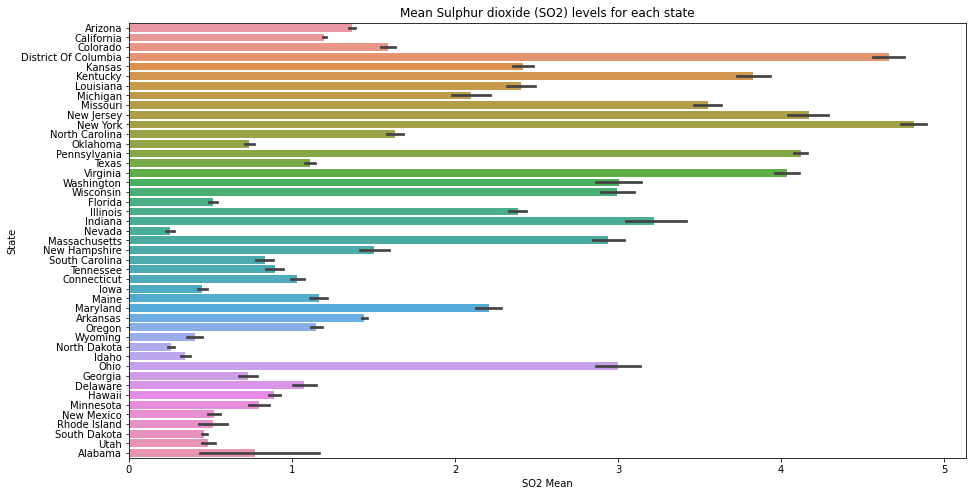

In [52]:
# Mean O3 levels for each state
ax = sns.barplot(x="SO2 Mean",y="State", data=SO2_data)
plt.title("Mean Sulphur dioxide (SO2) levels for each state")

In [40]:
# Carbon monoxide (CO) 
CO_data = df[["Year","Date","State","CO Mean","CO 1st Max Value", "CO 1st Max Hour", "CO AQI"]]
print('Carbon monoxide (CO) Data')                     
CO_data.head()

Carbon monoxide (CO) Data


,Year,Date,State,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,2000.0,1/1/2000,Arizona,0.878947,2.2,23,25
1,2000.0,1/2/2000,Arizona,1.066667,2.3,0,26
2,2000.0,1/3/2000,Arizona,1.762500,2.5,8,28
25,2000.0,1/26/2000,Arizona,0.866667,1.4,0,16
26,2000.0,1/27/2000,Arizona,0.925000,1.6,23,18


Text(0.5, 1.0, 'Mean Carbon monoxide (CO) levels for each state')

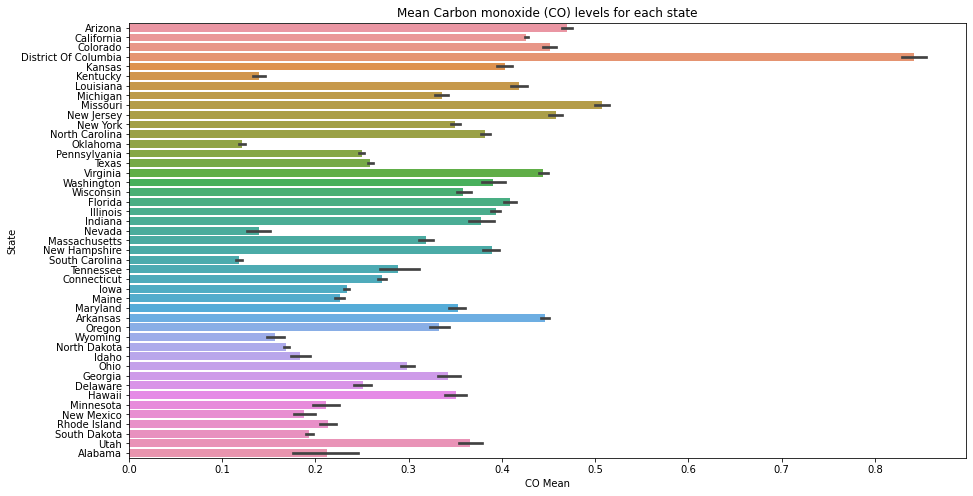

In [41]:
# Mean CO levels for each state
ax = sns.barplot(x="CO Mean",y="State", data=CO_data)
plt.title("Mean Carbon monoxide (CO) levels for each state")

In [42]:
#Checking corelation between gases.
## Prepare all 4 AQIs against state and date 
df_AQIs = df[['State','Date','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
df_AQIs = df_AQIs.dropna(axis='rows')  # Delete rows with NAs
df_AQIs['Date'] = pd.to_datetime(df_AQIs['Date'],format='%Y-%m-%d')  # converting date from strig to date
pollStGrouped = df_AQIs.groupby(level=0)

ValueError: time data 1/1/2000 doesn't match format specified

In [43]:
df_AQIs.info

<bound method DataFrame.info of                        State        Date  NO2 AQI  O3 AQI  SO2 AQI  CO AQI
0                    Arizona    1/1/2000       46      37       13      25
1                    Arizona    1/2/2000       34      30        4      26
2                    Arizona    1/3/2000       48      15       16      28
25                   Arizona   1/26/2000       40      32       10      16
26                   Arizona   1/27/2000       48      26       16      18
...                      ...         ...      ...     ...      ...     ...
349995  District Of Columbia  12/13/2013       37      21        4       0
349996  District Of Columbia  12/14/2013       33       9        3       0
349997  District Of Columbia  12/15/2013       18      24        1       0
349998  District Of Columbia  12/16/2013       20      19        1       0
349999  District Of Columbia  12/17/2013       26       3       23       0

[279925 rows x 6 columns]>

In [44]:
df_AQIs = df_AQIs.rename(columns={'NO2 AQI': 'NO2_AQI', 'O3 AQI': 'O3_AQI', 'SO2 AQI': 'SO2_AQI', 'CO AQI': 'CO_AQI' })
df_AQIs.head(5)

,State,Date,NO2_AQI,O3_AQI,SO2_AQI,CO_AQI
0,Arizona,1/1/2000,46,37,13,25
1,Arizona,1/2/2000,34,30,4,26
2,Arizona,1/3/2000,48,15,16,28
25,Arizona,1/26/2000,40,32,10,16
26,Arizona,1/27/2000,48,26,16,18


In [45]:
#Creating correlation matrix
df_AQIs.corr()

,NO2_AQI,O3_AQI,SO2_AQI,CO_AQI
NO2_AQI,1.000000,0.053748,0.298069,0.602556
O3_AQI,0.053748,1.000000,0.053856,-0.137795
SO2_AQI,0.298069,0.053856,1.000000,0.155489
CO_AQI,0.602556,-0.137795,0.155489,1.000000


,NO2_AQI,O3_AQI,SO2_AQI,CO_AQI
NO2_AQI,1.000000,0.053748,0.298069,0.602556
O3_AQI,0.053748,1.000000,0.053856,-0.137795
SO2_AQI,0.298069,0.053856,1.000000,0.155489
CO_AQI,0.602556,-0.137795,0.155489,1.000000


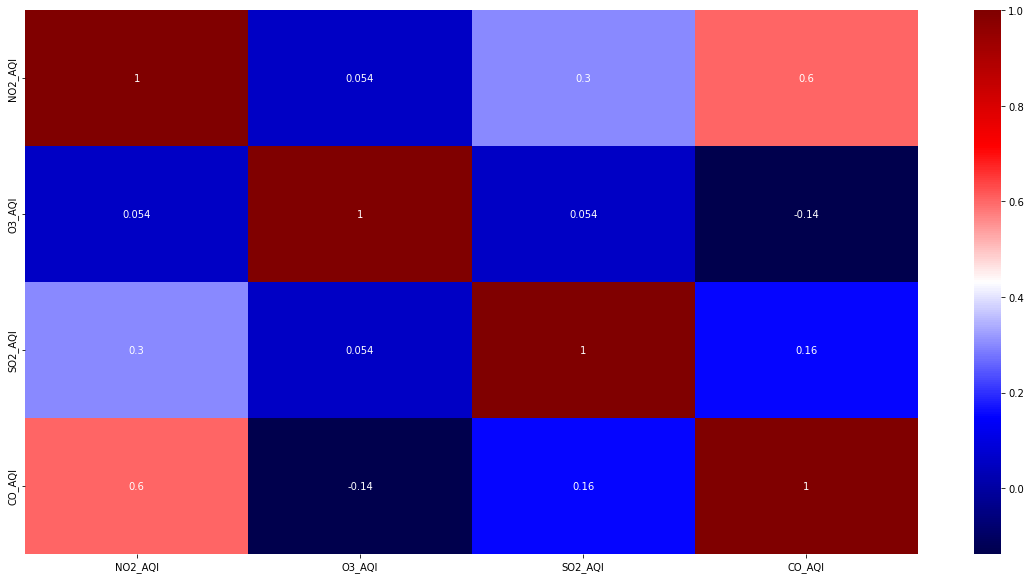

In [46]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df_AQIs.corr()
sns.heatmap(c,cmap='seismic',annot=True)
c

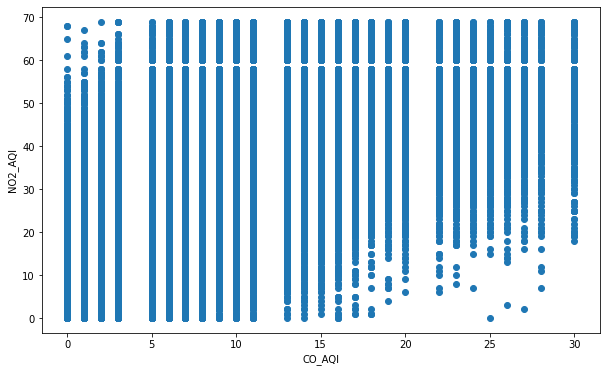

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_AQIs['CO_AQI'], df_AQIs['NO2_AQI'])
ax.set_xlabel('CO_AQI')
ax.set_ylabel('NO2_AQI')
plt.show()

ValueError: could not convert string to float: 'Arizona'

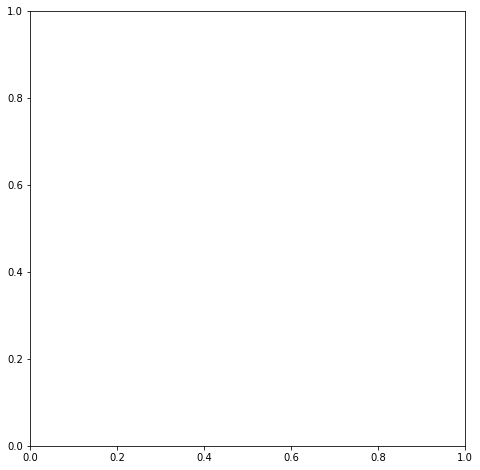

In [51]:
plt.pie(df_AQIs)
plt.show()

In [30]:
#Pollutant Trends Over Time in US 

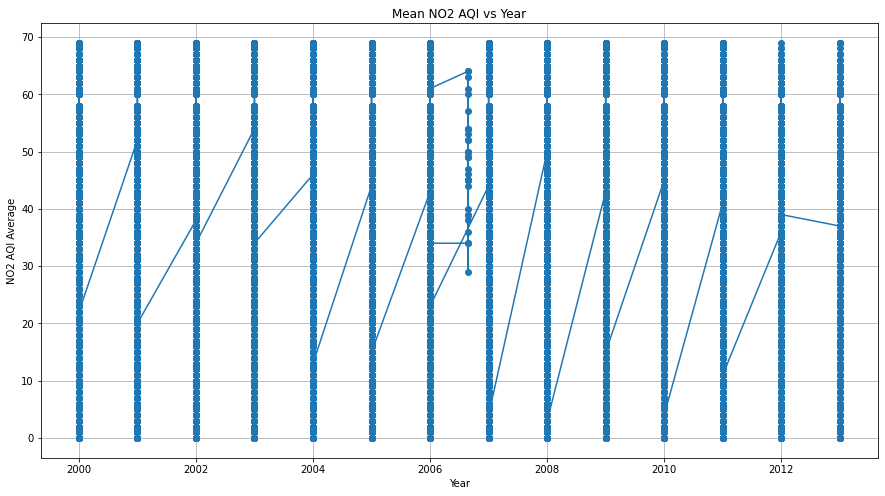

In [50]:
#Mean NO2 AQI vs Year
plt.plot(df['Year'], df['NO2 AQI'], marker='o')
plt.title("Mean NO2 AQI vs Year")
plt.xlabel("Year")
plt.ylabel("NO2 AQI Average")
plt.grid()
plt.show()

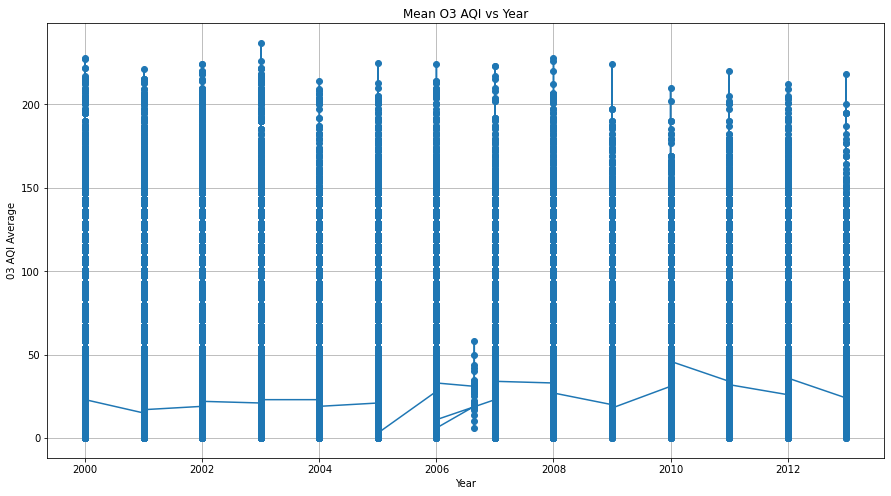

In [32]:
#03 AQI Average
plt.subplot()
plt.plot(df['Year'], df['O3 AQI'], marker='o')
plt.title("Mean O3 AQI vs Year")
plt.xlabel("Year")
plt.ylabel("03 AQI Average")
plt.grid()
plt.show()

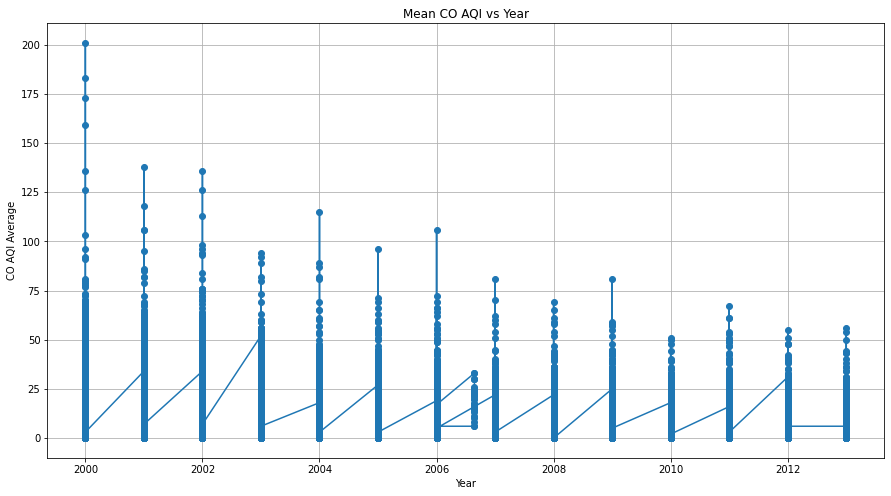

In [33]:
#Mean CO AQI vs Year
plt.subplot()
plt.plot(df['Year'], df['CO AQI'], marker='o')
plt.title("Mean CO AQI vs Year")
plt.xlabel("Year")
plt.ylabel("CO AQI Average")
plt.grid()
plt.show()

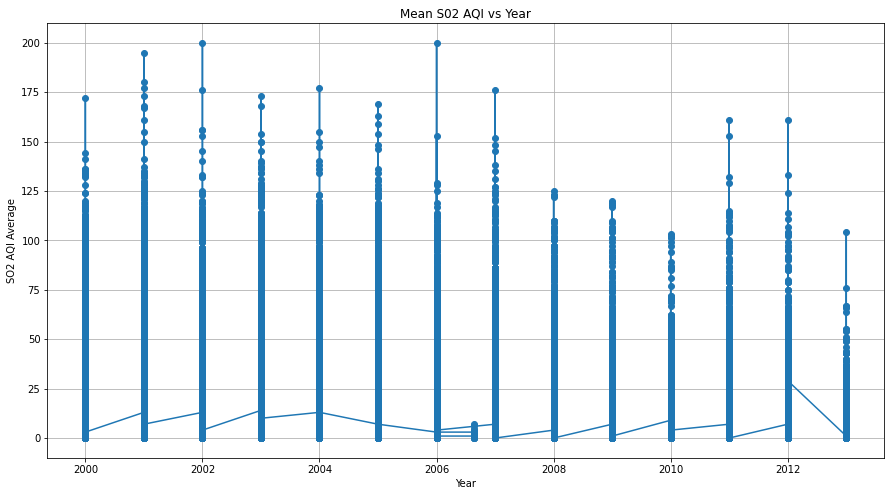

In [34]:
# Mean S02 AQI vs Year
plt.subplot()
plt.plot(df['Year'], df['SO2 AQI'], marker='o')
plt.title("Mean S02 AQI vs Year")
plt.xlabel("Year")
plt.ylabel("SO2 AQI Average")
plt.grid()
plt.show()

In [35]:
df_AQI = df[['State', 'Date', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']]
df_AQI_State = df_AQI.groupby('State').mean()
df_AQI_State.reset_index(inplace=True)

TOP 10 biggest polluters by mean value of AQI for Nitrogen Dioxide (NO2)


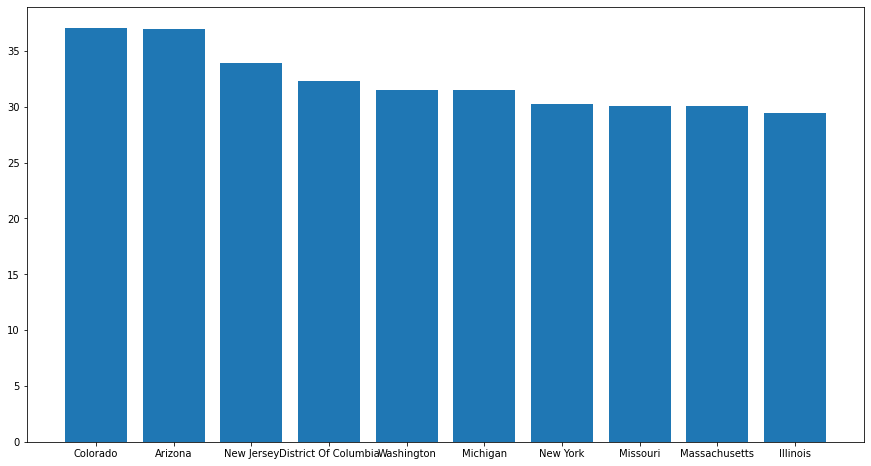

In [36]:
df_AQI_State.sort_values(by = 'NO2 AQI', ascending = False, inplace = True)
barplot1 = plt.bar('State', 'NO2 AQI', data=df_AQI_State[:10], label = 'NO2')
plt.rcParams["figure.figsize"] = (10,5) 
print('TOP 10 biggest polluters by mean value of AQI for Nitrogen Dioxide (NO2)')

TOP 10 biggest polluters by mean value of AQI for Ozone (O3).


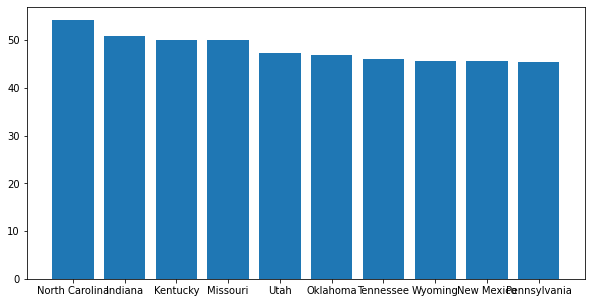

In [37]:
df_AQI_State.sort_values(by = 'O3 AQI', ascending = False, inplace = True)
barplot1 = plt.bar('State', 'O3 AQI', data=df_AQI_State[:10], label = 'NO2')
plt.rcParams["figure.figsize"] = (10,5) 
print('TOP 10 biggest polluters by mean value of AQI for Ozone (O3).')

TOP 10 biggest polluters by mean value of AQI for Sulphur dioxide (SO2). 


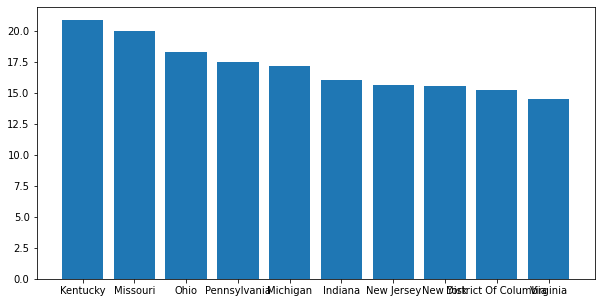

In [38]:
df_AQI_State.sort_values(by = 'SO2 AQI', ascending = False, inplace = True)
barplot1 = plt.bar('State', 'SO2 AQI', data=df_AQI_State[:10], label = 'NO2')
plt.rcParams["figure.figsize"] = (15,10) 
print('TOP 10 biggest polluters by mean value of AQI for Sulphur dioxide (SO2). ')

TOP 10 biggest polluters by mean value of AQI for Carbon monoxide (CO


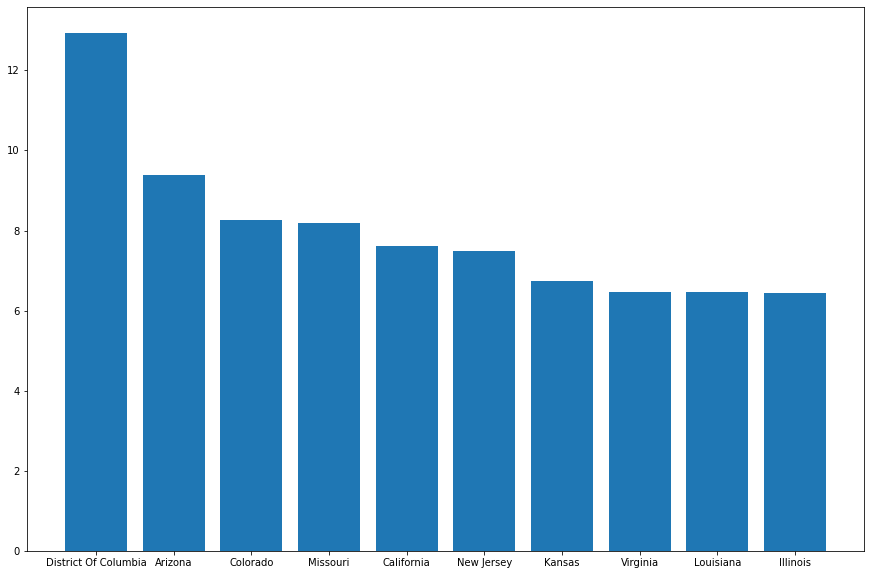

In [39]:
df_AQI_State.sort_values(by = 'CO AQI', ascending = False, inplace = True)
barplot1 = plt.bar('State', 'CO AQI', data=df_AQI_State[:10], label = 'NO2')
plt.rcParams["figure.figsize"] = (15,10) 
print('TOP 10 biggest polluters by mean value of AQI for Carbon monoxide (CO')

In [40]:
#The highest average pollution level for the years 2001-2021 is for ozone and it is around 54.26. 
#Next is for Nitrogen Dioxide NO2 at around 37.08  AQI and then for Sulphur Dioxide SO2 of around 20.92 AQI. 
#The lowest level is for Carbon Monoxide at around 12.93 AQI.
#By the mean value of Ozone the biggest polluters are respectively North Carolina 54.26 AQI.
#Kentucky is also one of the biggest polluters for SO2 (20.92  AQI)
#For NO2 the record holders is colorado with 37.08 AQI
#Country of Columbia district and Arizona satate are biggest pollutant of carbon monoxied with 12.93 AQI.



In [41]:
#Pollution changes over time:

In [42]:
df_AQI_Year = df_AQI[['Date', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']].resample('Y', on = 'Date').mean()
df_AQI_Year.reset_index(inplace=True)

Text(0, 0.5, 'Mean value of NO2  AQI')

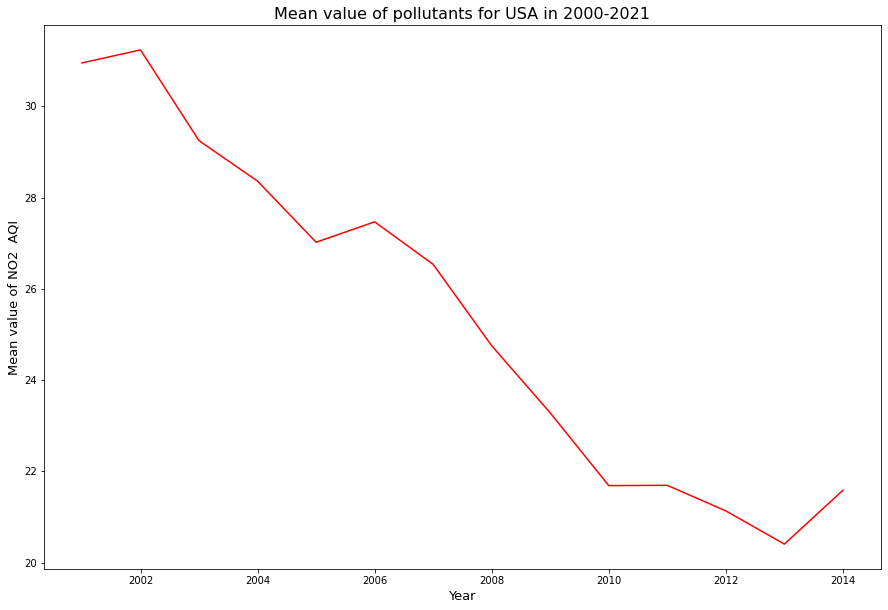

In [43]:
fig, ax = plt.subplots()
ax.plot('Date', 'NO2 AQI', data=df_AQI_Year, color = "red", label = "NO2 AQI")
plt.title('Mean value of pollutants for USA in 2000-2021', fontsize = 16)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Mean value of NO2  AQI", fontsize = 13)

Text(0, 0.5, 'Mean value of CO  AQI')

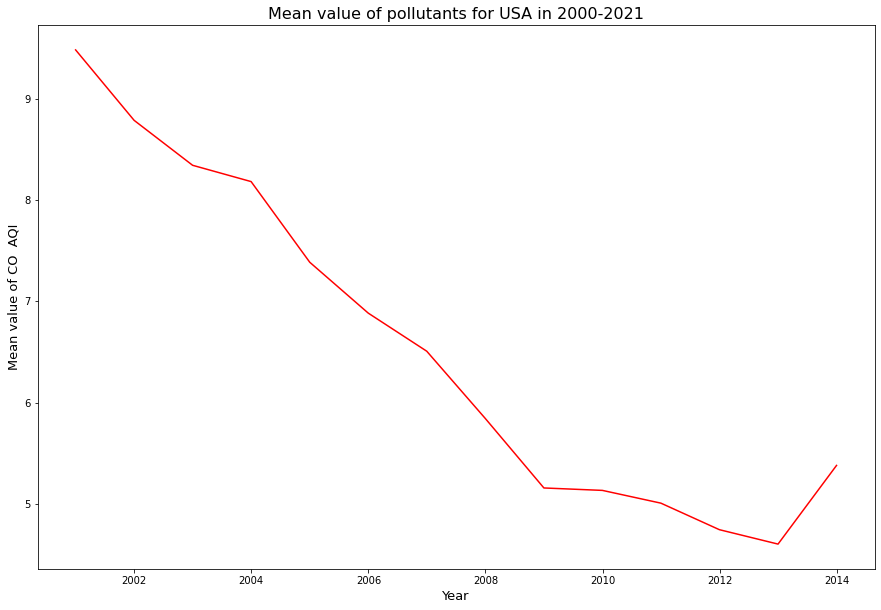

In [58]:
fig, pl = plt.subplots()
pl.plot('Date', 'CO AQI', data=df_AQI_Year, color = "red", label = "CO AQI")
plt.title('Mean value of pollutants for USA in 2000-2021', fontsize = 16)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Mean value of CO  AQI", fontsize = 13)

Text(0, 0.5, 'Mean value of O3  AQI')

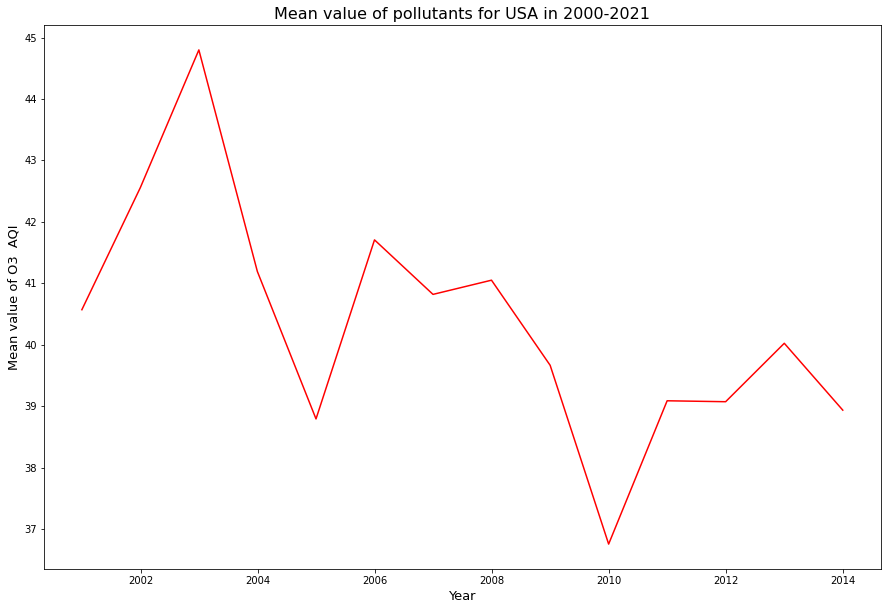

In [45]:
fig, ax = plt.subplots()
ax.plot('Date', 'O3 AQI', data=df_AQI_Year, color = "red", label = "O3 AQI")
plt.title('Mean value of pollutants for USA in 2000-2021', fontsize = 16)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Mean value of O3  AQI", fontsize = 13)

Text(0, 0.5, 'Mean value of SO2  AQI')

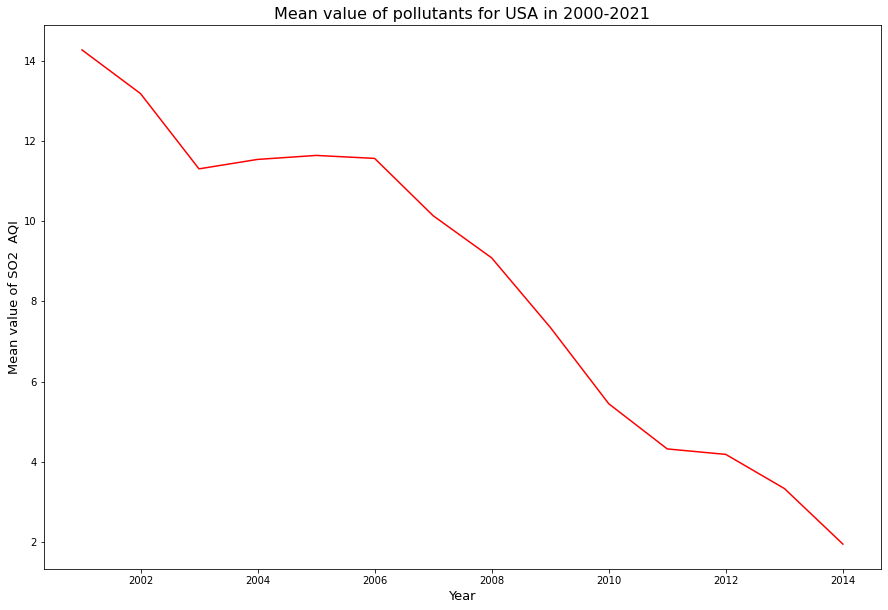

In [46]:
fig, ax = plt.subplots()
ax.plot('Date', 'SO2 AQI', data=df_AQI_Year, color = "red", label = "SO2 AQI")
plt.title('Mean value of pollutants for USA in 2000-2021', fontsize = 16)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Mean value of SO2  AQI", fontsize = 13)

In [47]:
#From the line plots shown above, we can conlcude that Sulphur dioxide SO2, Nitrogen Dioxide NO2 and Carbo Monoxide CO all have
#decreasing Air Qulaity Index AQI except for Ozone O3 which have decreasing and increasing Air Quality Index AQI.

<AxesSubplot:title={'center':'Age Frequency Polygon'}, ylabel='Frequency'>

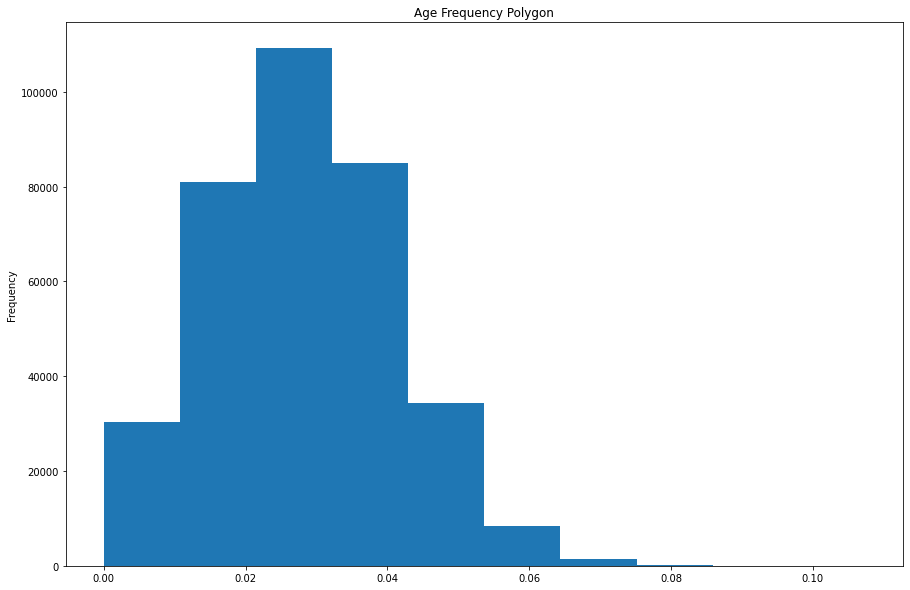

In [48]:
df['O3 Mean'].plot(kind='hist',title= 'Age Frequency Polygon')